In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data_diabetes = pd.read_csv('diabetes.csv')

In [3]:
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
data_diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [6]:
x = data_diabetes.drop(columns = 'Outcome', axis = 1)
y = data_diabetes['Outcome']

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Best k value: 10


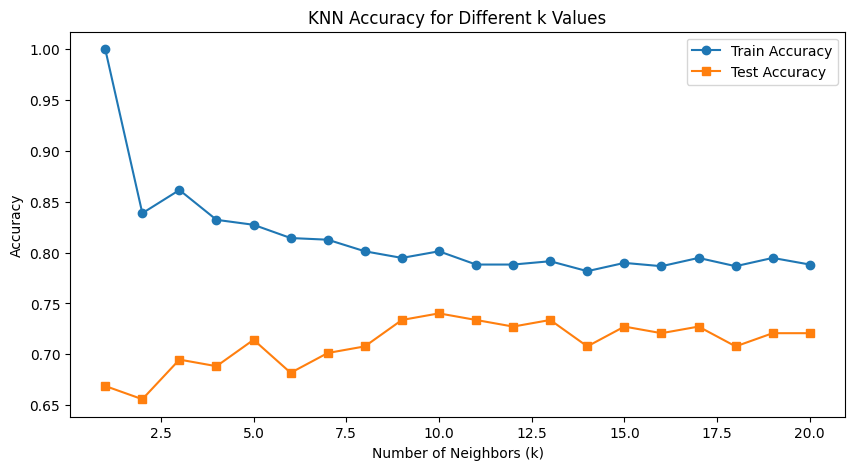

In [9]:
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Accuracy calculations
    train_acc = accuracy_score(Y_train, y_train_pred)
    test_acc = accuracy_score(Y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


best_k = k_values[test_accuracies.index(max(test_accuracies))]
print(f"Best k value: {best_k}")

#plotting to check value with better result
plt.figure(figsize=(10,5))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.show()


In [11]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

A very large 𝑘
leads to high bias (underfitting), as the model relies too much on distant points and ignores local structure.

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       100
           1       0.75      0.39      0.51        54

    accuracy                           0.74       154
   macro avg       0.74      0.66      0.67       154
weighted avg       0.74      0.74      0.71       154

[[93  7]
 [33 21]]


In [14]:
print("KNN Accuracy:", accuracy_score(Y_test, y_pred))

KNN Accuracy: 0.7402597402597403


In [16]:
input_data = (13,126,90,0,0,43.4,0.583,42) 
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 2.71576261  0.1408929   1.04866833 -1.29075209 -0.70188945  1.40390274
   0.33604845  0.74468563]]


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
prediction_Knn = classifier.predict(std_data)
print(prediction_Knn)
if prediction_Knn == 1:
    print('diabetic')
else :
    print('non diabetic')

[0]
non diabetic
